# BONUS PROJECT: Data Preprocessing & Feature Engineering for Machine Learning

## Data Import and first Inspection

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv("housing.csv")

In [7]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


__Features__:

* **longitude:**  geographic coordinate (district´s east-west position)
* **latitude:**  geographic coordinate (district´s north-south position)
* **housing_median_age:** median age of houses in district
* **total_rooms** Sum of all rooms in district
* **total_bedrooms** Sum of all bedrooms in district
* **population:** total population in district
* **households:** total households in district
* **median_income:** median household income in district 
* **median_house_value:** median house value in district
* **ocean_proximity:** District´s proximity to the ocean

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
df[df.total_bedrooms.isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [15]:
df[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [17]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [19]:
df.describe(include = "O")

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [21]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [23]:
df.total_rooms.value_counts()

total_rooms
1527.0     18
1613.0     17
1582.0     17
2127.0     16
1717.0     15
           ..
9614.0      1
10839.0     1
11872.0     1
6205.0      1
10035.0     1
Name: count, Length: 5926, dtype: int64

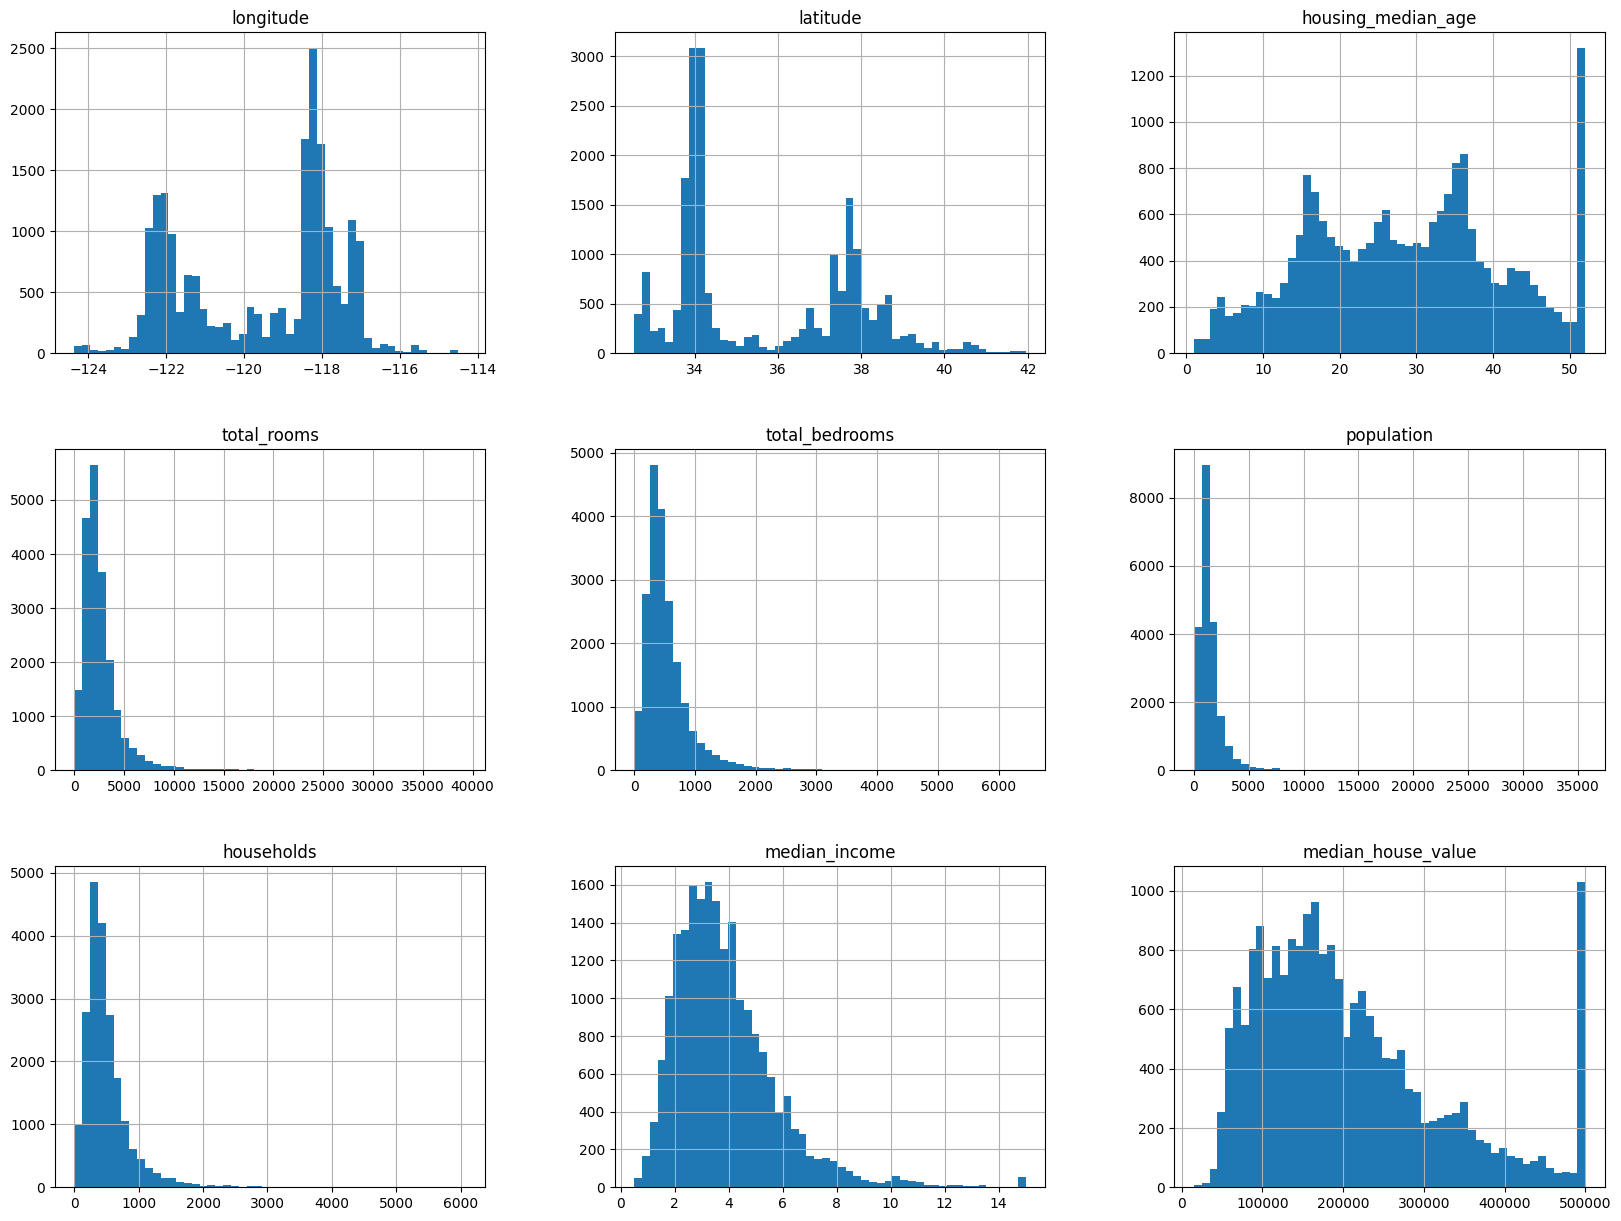

In [25]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## Data Cleaning and Creating additional Features

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [30]:
df.dropna(inplace = True)

In [32]:
df["rooms_per_household"] = df.total_rooms.div(df.households)

In [34]:
df.rooms_per_household.nlargest(10)

1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
1912      56.269231
9676      52.848214
11707     52.690476
2395      50.837838
1240      47.515152
Name: rooms_per_household, dtype: float64

In [36]:
df.rooms_per_household.nsmallest(10)

5916     0.846154
8219     0.888889
3126     1.000000
14818    1.130435
17820    1.130435
4552     1.260870
4550     1.378486
4587     1.411290
4602     1.465753
12484    1.550409
Name: rooms_per_household, dtype: float64

In [38]:
df.loc[[1979, 5916, 8219]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
1979,-120.08,38.80,34.0,1988.0,511.0,36.0,15.0,4.6250,162500.0,INLAND,132.533333
5916,-118.44,34.28,46.0,11.0,11.0,24.0,13.0,2.8750,162500.0,<1H OCEAN,0.846154
8219,-118.21,33.79,33.0,32.0,18.0,96.0,36.0,4.5938,112500.0,NEAR OCEAN,0.888889


In [40]:
df["pop_per_household"] = df.population.div(df.households)

In [42]:
df["bedrooms_per_room"] = df.total_bedrooms.div(df.total_rooms)

In [44]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,pop_per_household,bedrooms_per_room
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,5.431344,3.071533,0.213039
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,2.482946,10.438269,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.692308,0.100000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,4.441441,2.429032,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,5.230769,2.817582,0.203162
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,6.052381,3.281513,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1243.333333,1.000000


## Which Factors influence House Prices?

In [72]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,pop_per_household,bedrooms_per_room
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,NEAR BAY,6.98,2.56,0.15
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,NEAR BAY,6.24,2.11,0.16
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,NEAR BAY,8.29,2.80,0.13
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,NEAR BAY,5.82,2.55,0.18
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,NEAR BAY,6.28,2.18,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.00,1665.00,374.00,845.00,330.00,1.56,78100.00,INLAND,5.05,2.56,0.22
20636,-121.21,39.49,18.00,697.00,150.00,356.00,114.00,2.56,77100.00,INLAND,6.11,3.12,0.22
20637,-121.22,39.43,17.00,2254.00,485.00,1007.00,433.00,1.70,92300.00,INLAND,5.21,2.33,0.22
20638,-121.32,39.43,18.00,1860.00,409.00,741.00,349.00,1.87,84700.00,INLAND,5.33,2.12,0.22


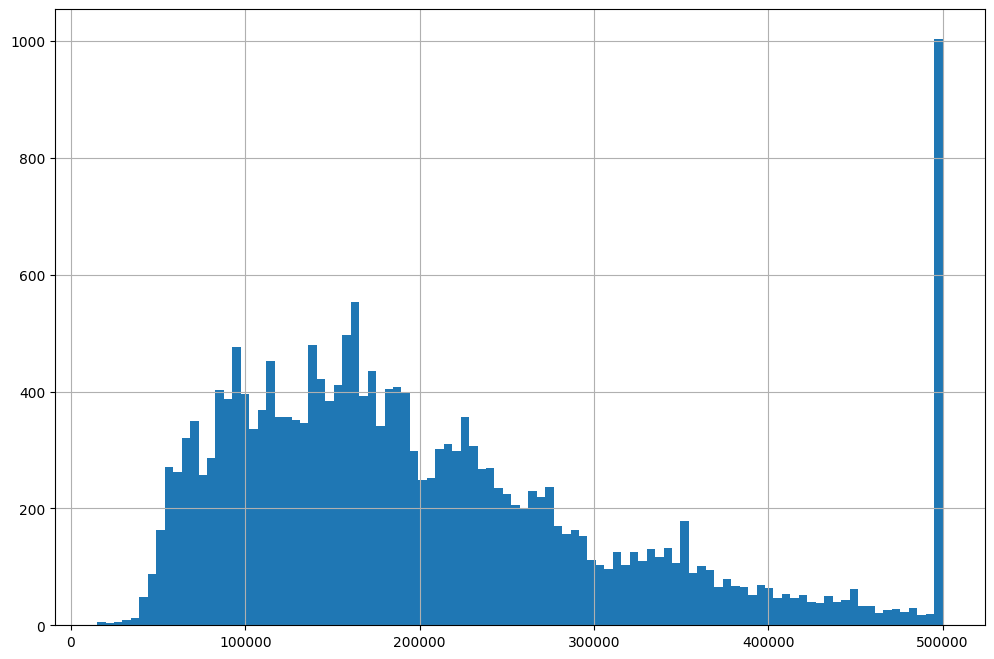

In [74]:
df.median_house_value.hist(bins = 100, figsize = (12, 8))
plt.show()

In [76]:
df.corr(numeric_only=True).median_house_value.sort_values(ascending = False)

median_house_value     1.00
median_income          0.69
rooms_per_household    0.15
total_rooms            0.13
housing_median_age     0.11
households             0.06
total_bedrooms         0.05
pop_per_household     -0.02
population            -0.03
longitude             -0.05
latitude              -0.14
bedrooms_per_room     -0.26
Name: median_house_value, dtype: float64

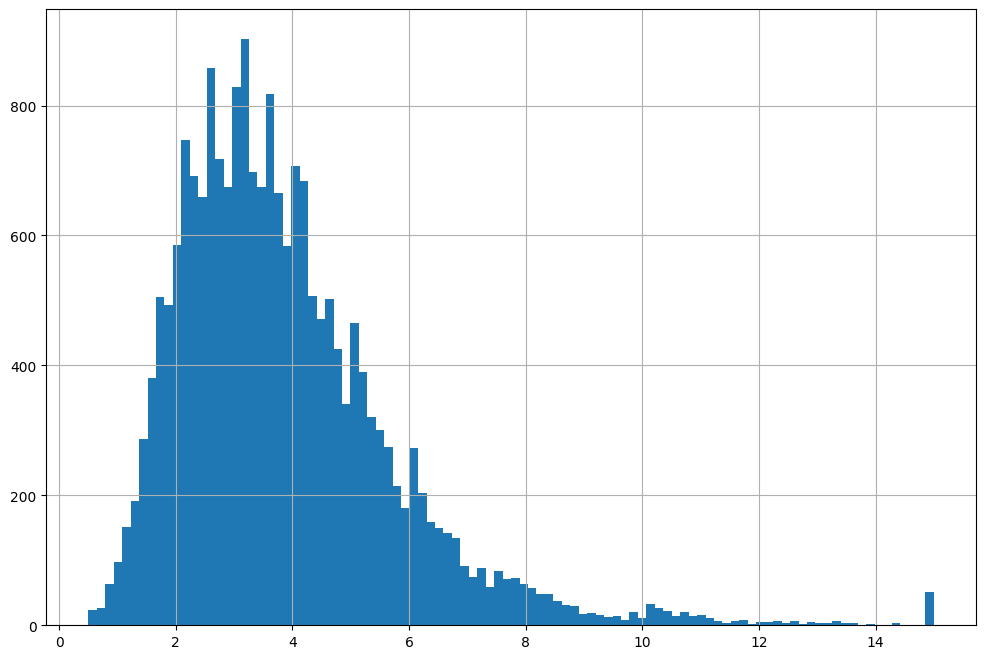

In [78]:
df.median_income.hist(bins = 100, figsize = (12, 8))
plt.show()

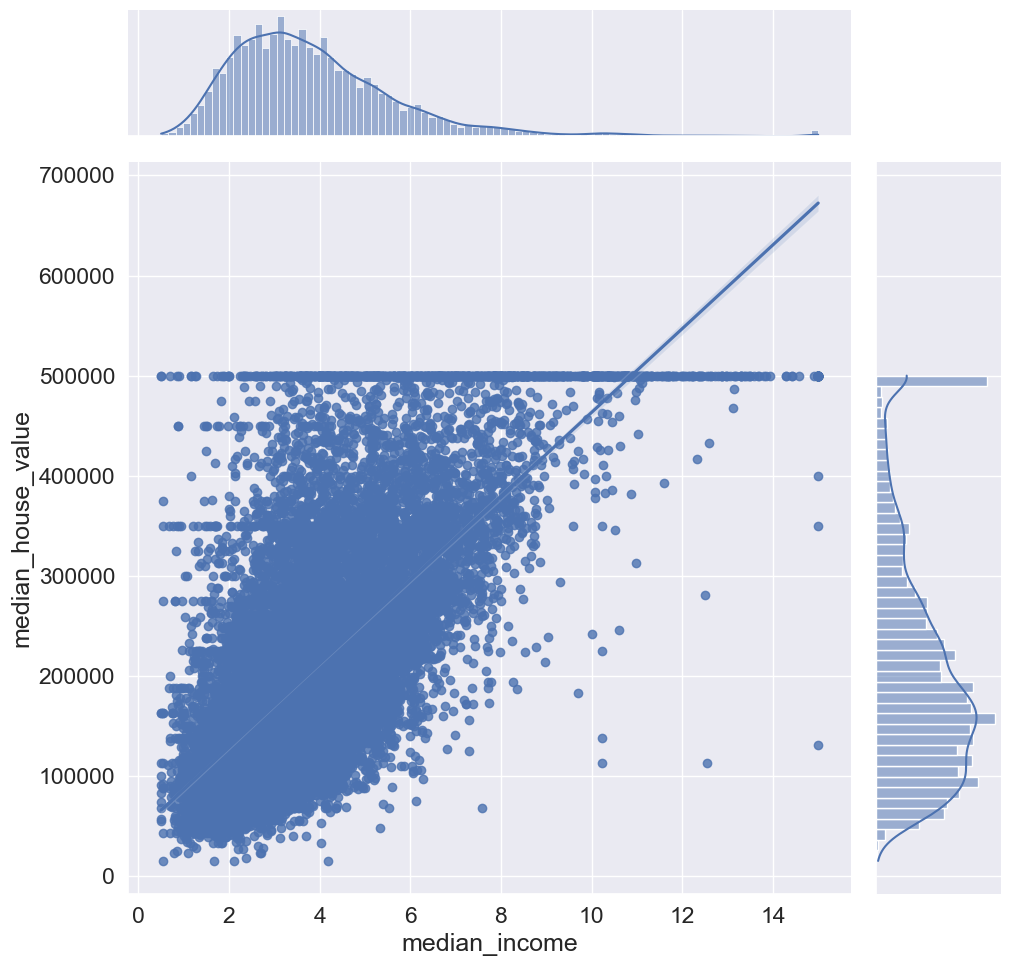

In [80]:
sns.set(font_scale=1.5)
sns.jointplot(data = df, x = "median_income", y = "median_house_value", kind = "reg", height = 10)
plt.show()

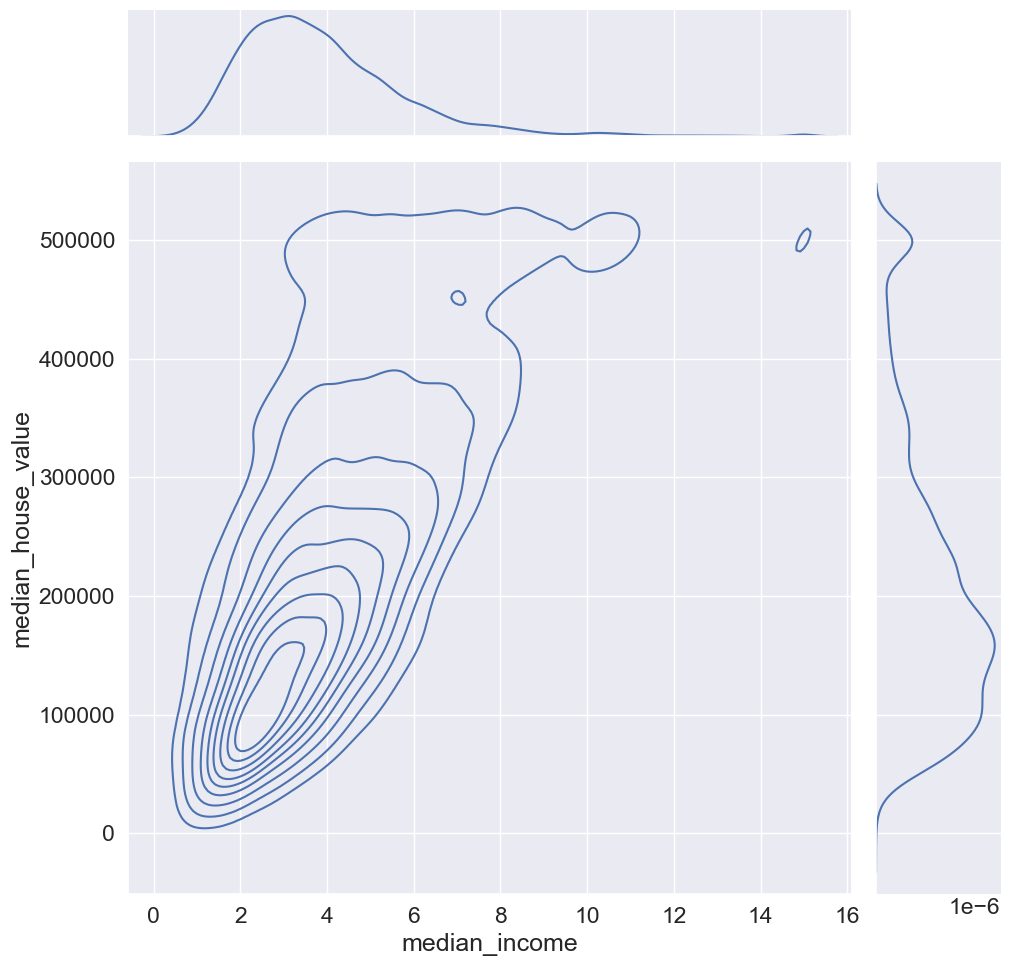

In [81]:
sns.set(font_scale=1.5)
sns.jointplot(data = df, x = "median_income", y = "median_house_value", kind = "kde", height = 10)
plt.show()

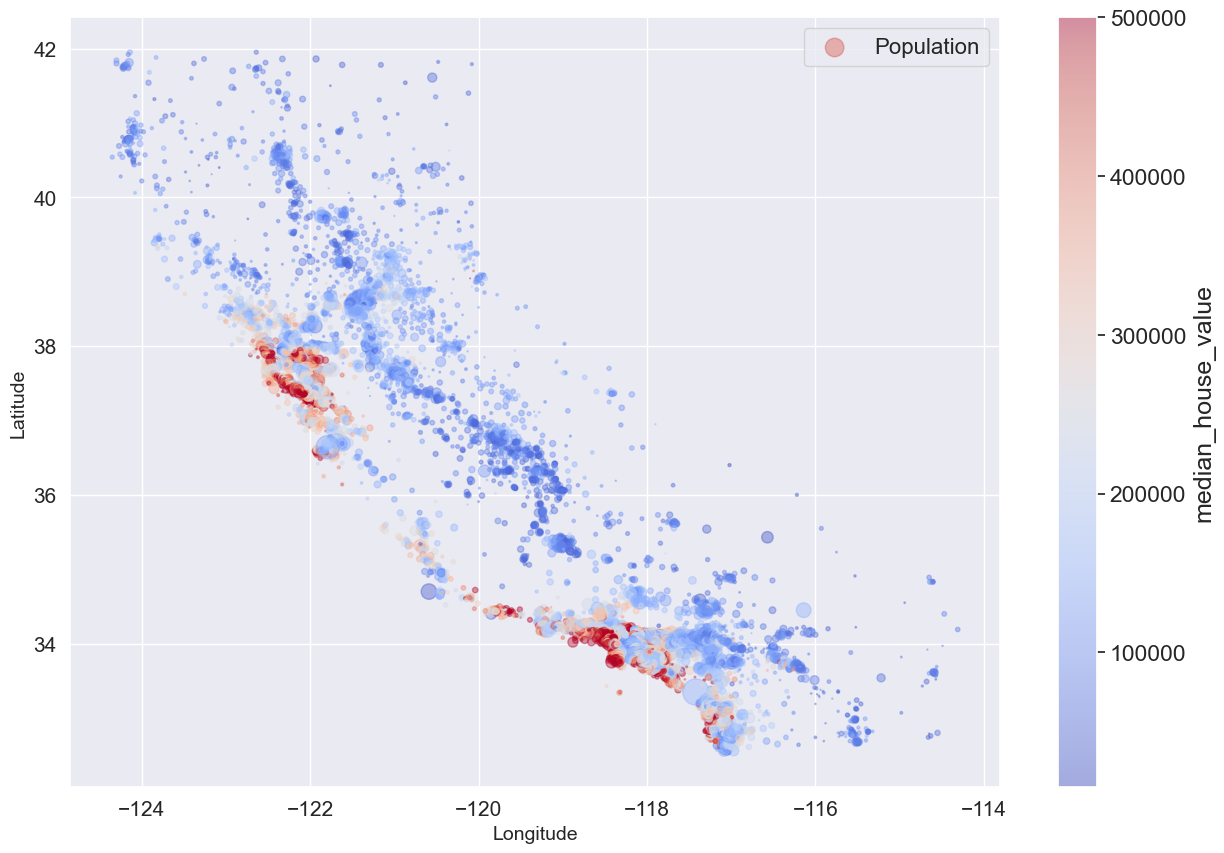

In [82]:
df.plot(kind="scatter", x="longitude", y="latitude",
                       s=df.population/100, label="Population", figsize = (15, 10),
                       c="median_house_value", cmap= "coolwarm",
                       colorbar=True, alpha=0.4, fontsize = 15, sharex = False)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

In [83]:
import matplotlib.image as mpimg
california_img = mpimg.imread("california.png")

In [85]:
california_img

array([[[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ]],

       [[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ]],

       [[0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        [0.627451 , 0.7764706, 0.9137255, 1.       ],
        ...,
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.6666667, 1.       ],
        [0.9647059, 0.827451 , 0.666666

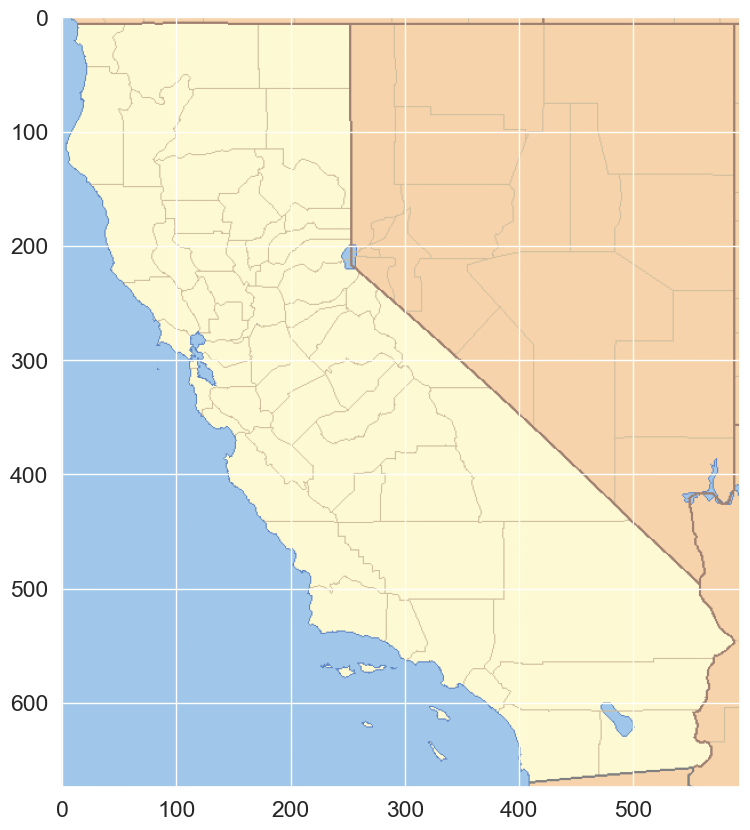

In [86]:
plt.figure(figsize = (15, 10))
plt.imshow(california_img)
plt.show()

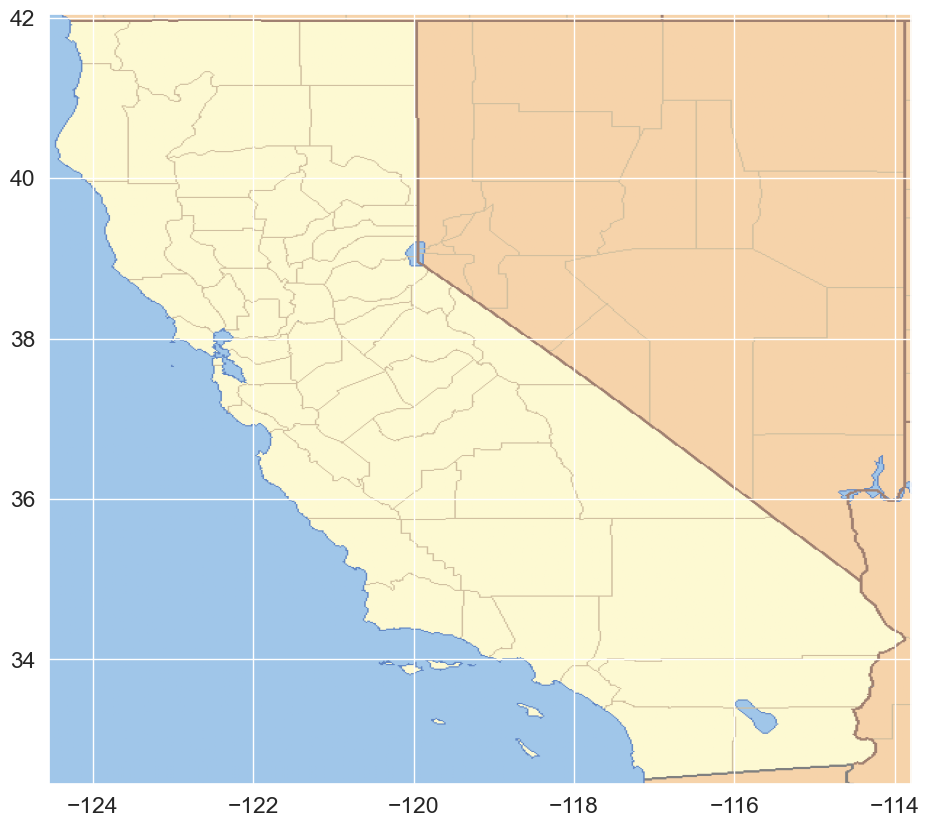

In [87]:
plt.figure(figsize = (15, 10))
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05])
plt.show()

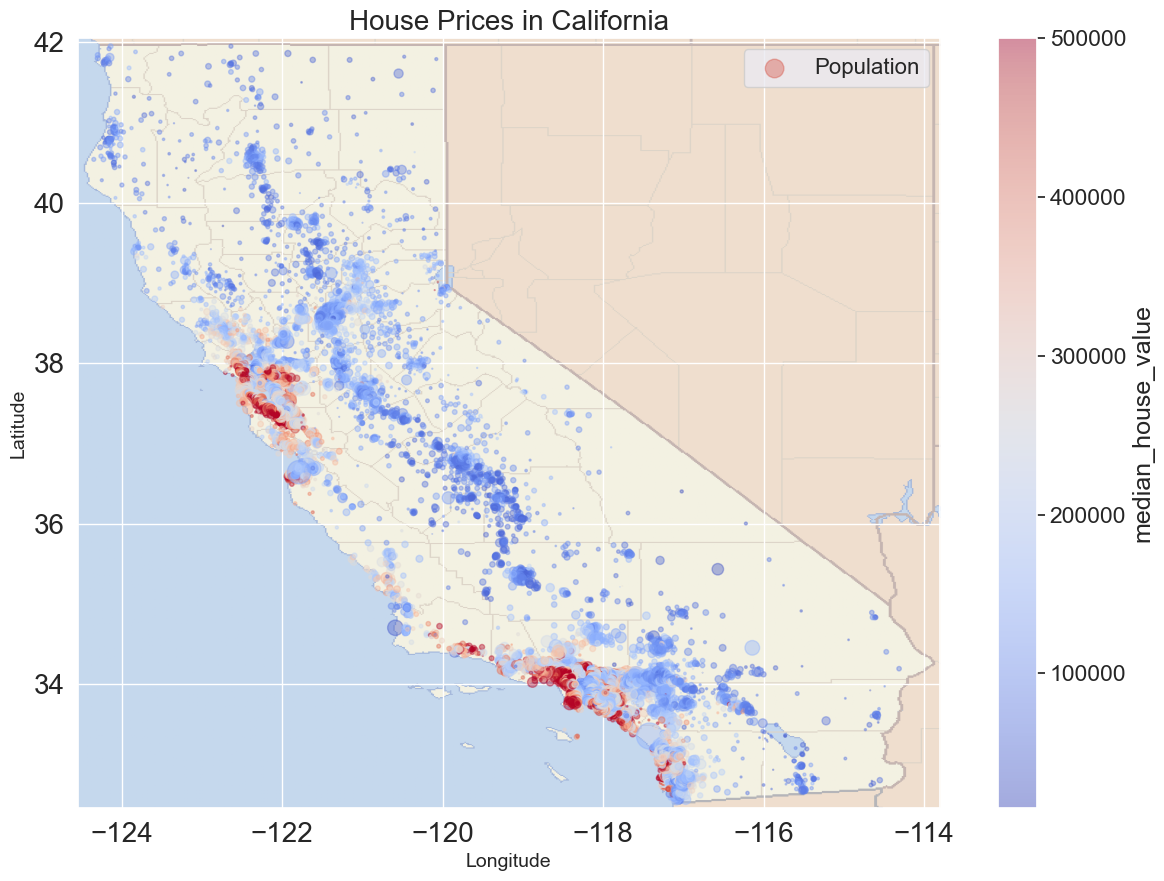

In [88]:
df.plot(kind="scatter", x="longitude", y="latitude",
                       s=df.population/100, label="Population", figsize = (15, 10),
                       c="median_house_value", cmap="coolwarm",
                       colorbar=True, alpha=0.4, fontsize = 20, sharex = False)
                      
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title("House Prices in California", fontsize = 20)
plt.legend(fontsize=16)
plt.show()

In [89]:
prox = df.ocean_proximity.unique()
prox

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [90]:
df_loc = df[df.ocean_proximity == prox[2]].copy()

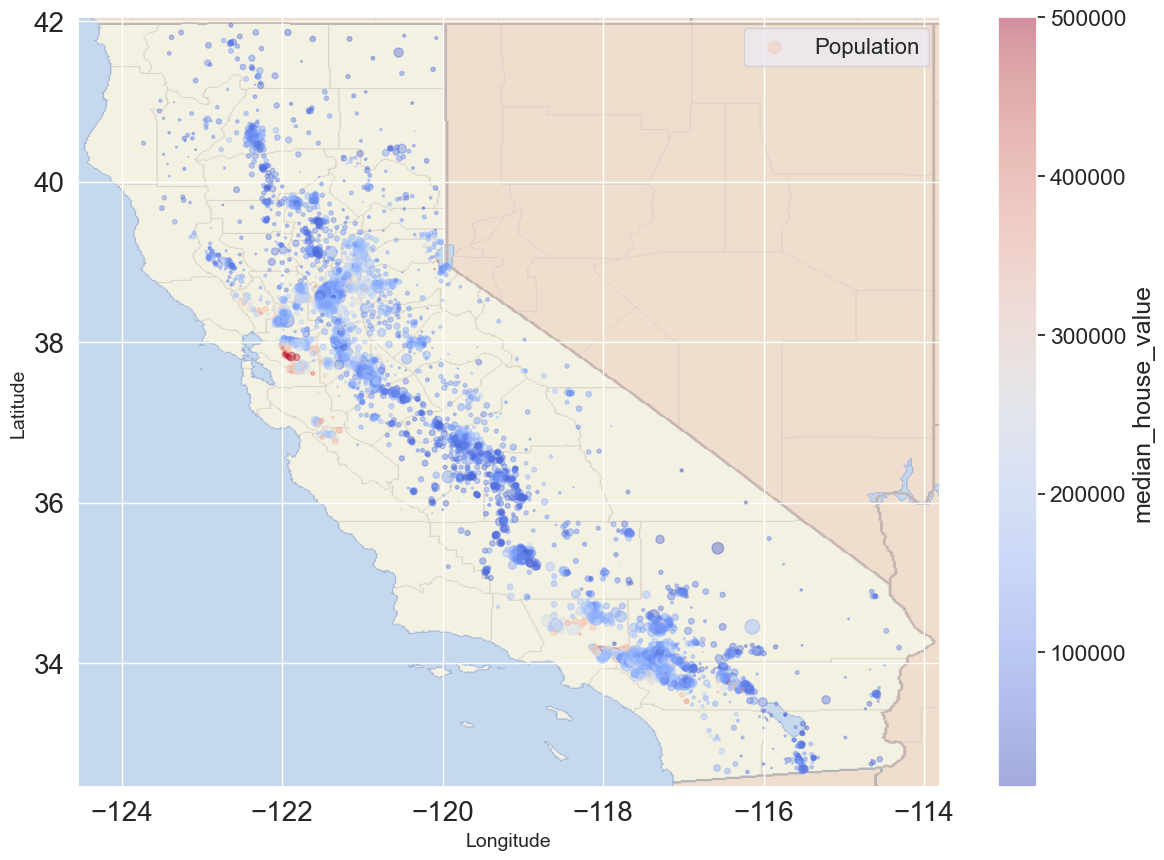

In [91]:
df_loc.plot(kind="scatter", x="longitude", y="latitude",
                       s=df_loc['population']/100, label="Population", figsize = (15, 10),
                       c="median_house_value", cmap="coolwarm",
                       colorbar=True, alpha=0.4, fontsize = 20, sharex = False
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

## Advanced Explanatory Data Analyis with Seaborn

In [102]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,pop_per_household,bedrooms_per_room
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,NEAR BAY,6.98,2.56,0.15
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,NEAR BAY,6.24,2.11,0.16
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,NEAR BAY,8.29,2.80,0.13
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,NEAR BAY,5.82,2.55,0.18
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,NEAR BAY,6.28,2.18,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.00,1665.00,374.00,845.00,330.00,1.56,78100.00,INLAND,5.05,2.56,0.22
20636,-121.21,39.49,18.00,697.00,150.00,356.00,114.00,2.56,77100.00,INLAND,6.11,3.12,0.22
20637,-121.22,39.43,17.00,2254.00,485.00,1007.00,433.00,1.70,92300.00,INLAND,5.21,2.33,0.22
20638,-121.32,39.43,18.00,1860.00,409.00,741.00,349.00,1.87,84700.00,INLAND,5.33,2.12,0.22


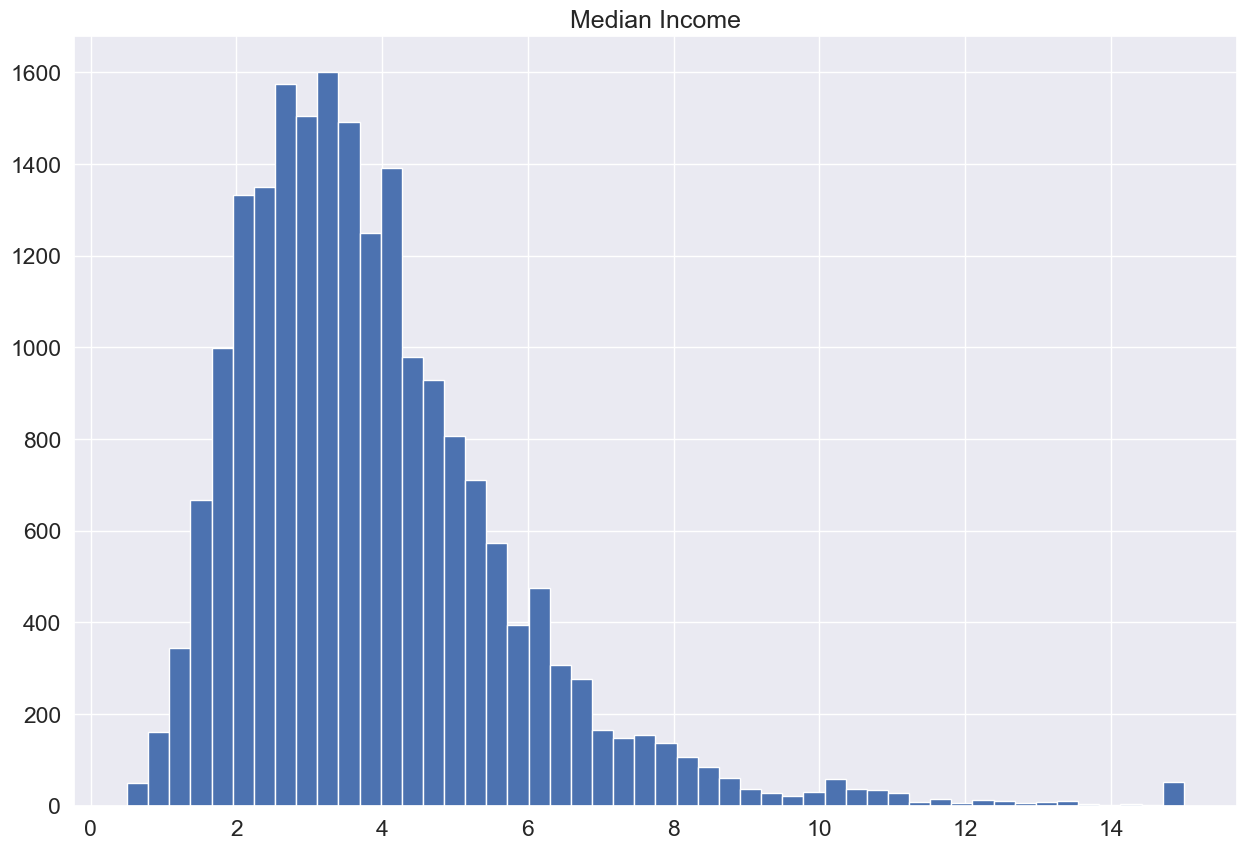

In [104]:
df.median_income.hist(bins=50, figsize=(15,10))
plt.title("Median Income")
plt.show()

In [106]:
pd.qcut(df.median_income, q = [0, 0.25, 0.5, 0.75, 0.95, 1])

0           (7.3, 15.0]
1           (7.3, 15.0]
2          (4.744, 7.3]
3          (4.744, 7.3]
4        (3.536, 4.744]
              ...      
20635    (0.499, 2.564]
20636    (0.499, 2.564]
20637    (0.499, 2.564]
20638    (0.499, 2.564]
20639    (0.499, 2.564]
Name: median_income, Length: 20433, dtype: category
Categories (5, interval[float64, right]): [(0.499, 2.564] < (2.564, 3.536] < (3.536, 4.744] < (4.744, 7.3] < (7.3, 15.0]]

In [108]:
df["income_cat"] = pd.qcut(df.median_income, q = [0, 0.25, 0.5, 0.75, 0.95, 1],
                           labels = ["Low", "Below_Average", "Above_Average", "High", "Very High"])

In [110]:
df.income_cat

0            Very High
1            Very High
2                 High
3                 High
4        Above_Average
             ...      
20635              Low
20636              Low
20637              Low
20638              Low
20639              Low
Name: income_cat, Length: 20433, dtype: category
Categories (5, object): ['Low' < 'Below_Average' < 'Above_Average' < 'High' < 'Very High']

In [112]:
df.income_cat.value_counts(normalize = True)

income_cat
Low             0.25
Above_Average   0.25
Below_Average   0.25
High            0.20
Very High       0.05
Name: proportion, dtype: float64

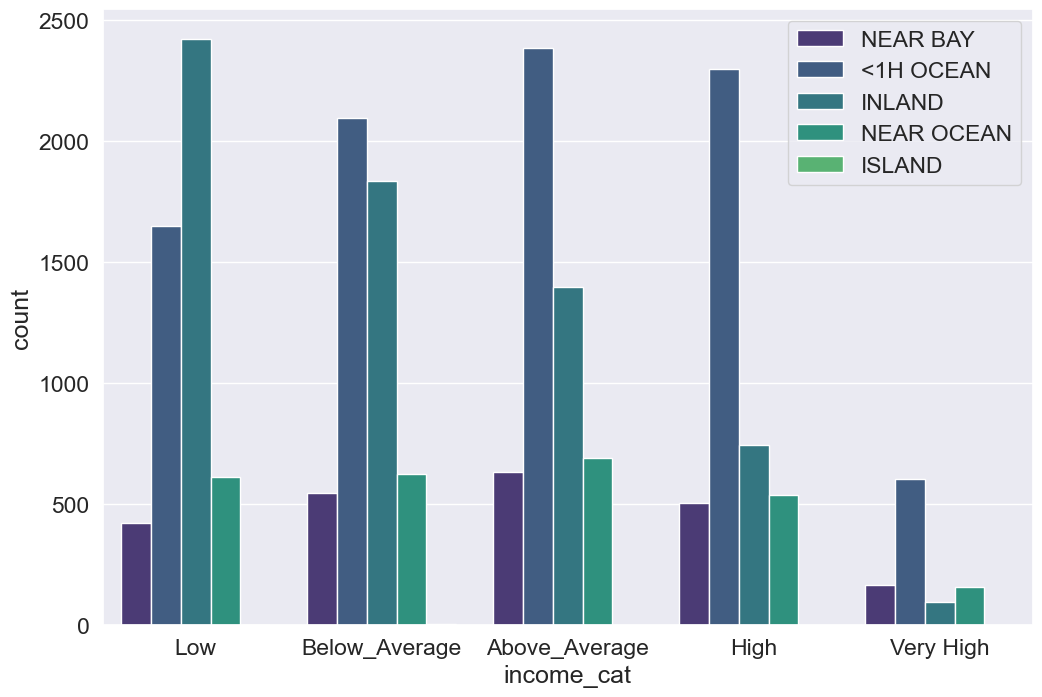

In [114]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5, palette= "viridis")
sns.countplot(data = df, x = "income_cat", hue = "ocean_proximity")
plt.legend(loc = 1)
plt.show()

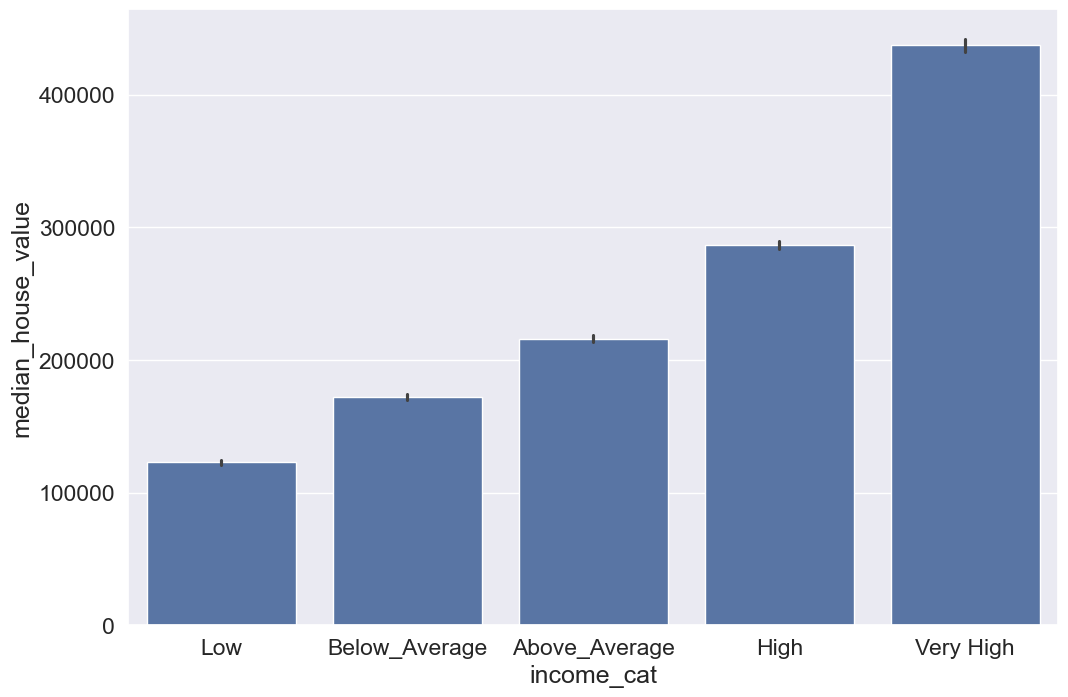

In [116]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.barplot(data = df, x = "income_cat", y = "median_house_value", dodge = True)
plt.show()

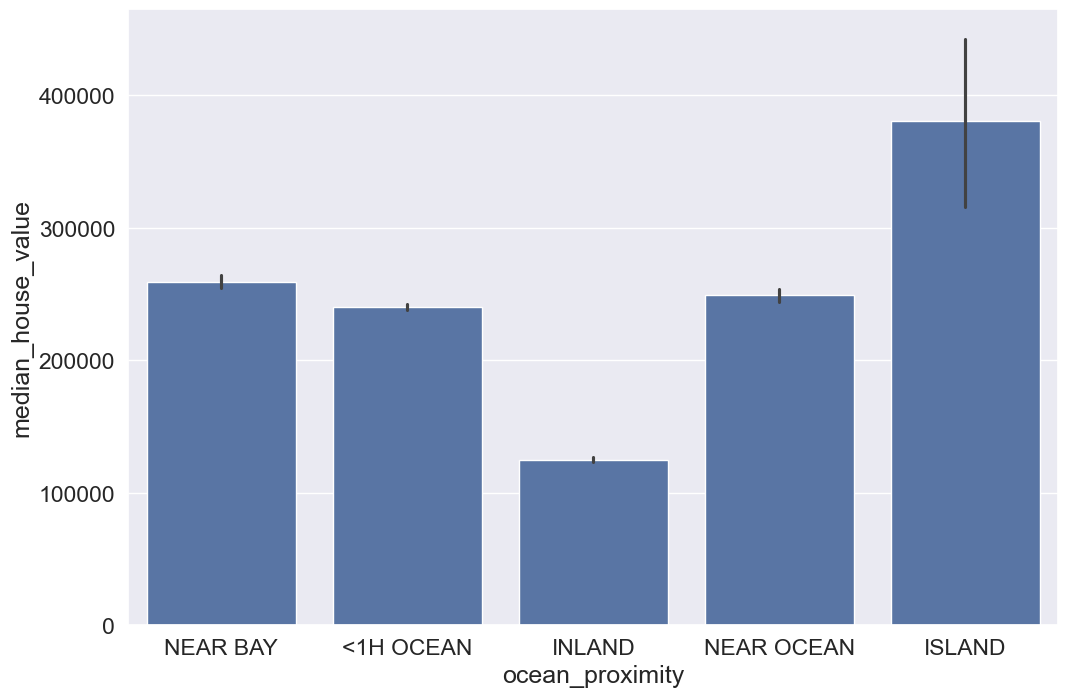

In [117]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.barplot(data = df, x = "ocean_proximity", y = "median_house_value", dodge = True)
plt.show()

In [119]:
matrix = df.groupby(["income_cat", "ocean_proximity"]).median_house_value.mean().unstack().drop(columns = ["ISLAND"])

C:\Users\Windows10\AppData\Local\Temp\ipykernel_37340\3379584032.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  matrix = df.groupby(["income_cat", "ocean_proximity"]).median_house_value.mean().unstack().drop(columns = ["ISLAND"])


In [122]:
matrix.astype("int")

ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_cat,,,,
Low,161337,84820,155122,148027
Below_Average,197236,115124,220196,208665
Above_Average,232278,147846,261965,255293
High,292208,208095,322566,337446
Very High,439784,347571,451015,468739


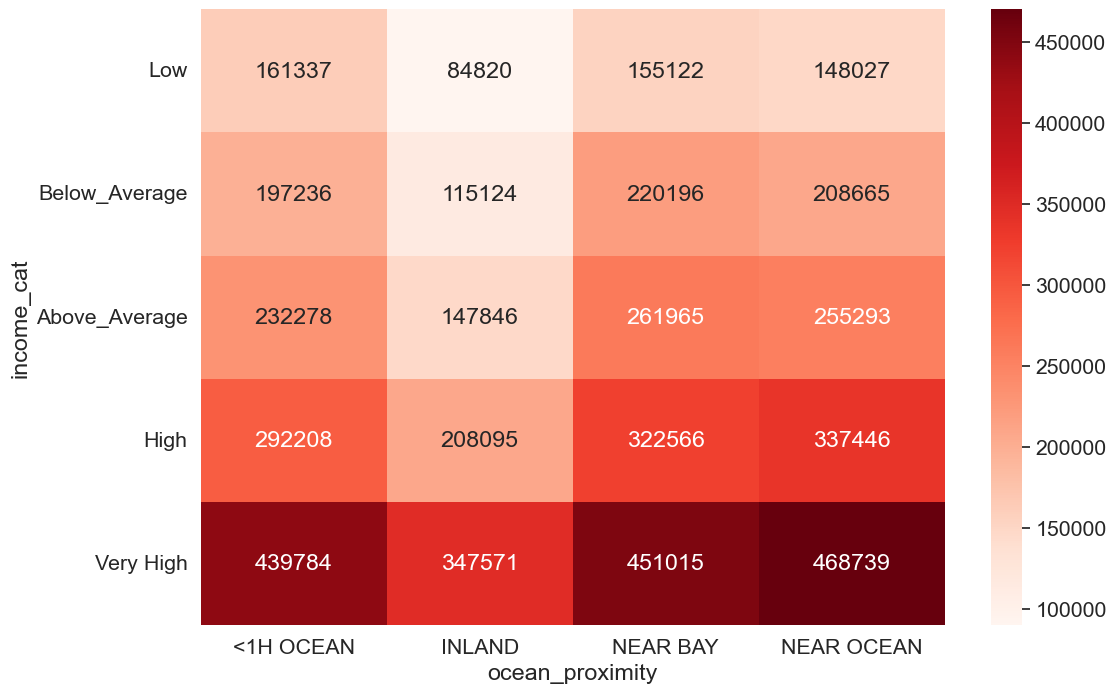

In [124]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(matrix.astype("int"), cmap = "Reds", annot = True, fmt = "d", vmin = 90000, vmax = 470000)
plt.show()

## Feature Engineering - Part 1

In [128]:
label = df.median_house_value.copy()
label

0       452600.00
1       358500.00
2       352100.00
3       341300.00
4       342200.00
           ...   
20635    78100.00
20636    77100.00
20637    92300.00
20638    84700.00
20639    89400.00
Name: median_house_value, Length: 20433, dtype: float64

In [48]:
features = df.drop(columns = ["median_house_value"])
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,pop_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853,2.181467,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,5.045455,2.560606,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,6.114035,3.122807,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,5.205543,2.325635,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,5.329513,2.123209,0.219892


In [50]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            20433 non-null  float64
 1   latitude             20433 non-null  float64
 2   housing_median_age   20433 non-null  float64
 3   total_rooms          20433 non-null  float64
 4   total_bedrooms       20433 non-null  float64
 5   population           20433 non-null  float64
 6   households           20433 non-null  float64
 7   median_income        20433 non-null  float64
 8   ocean_proximity      20433 non-null  object 
 9   rooms_per_household  20433 non-null  float64
 10  pop_per_household    20433 non-null  float64
 11  bedrooms_per_room    20433 non-null  float64
dtypes: float64(11), object(1)
memory usage: 2.5+ MB


In [52]:
features.select_dtypes("float")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,2.181467,0.172096
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,5.045455,2.560606,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,6.114035,3.122807,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,5.205543,2.325635,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,5.329513,2.123209,0.219892


In [54]:
import scipy.stats as stats

In [56]:
feat1 = features.select_dtypes("float").apply(lambda x: stats.zscore(x))
feat1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,0.625395,-0.049433,-1.146024
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,0.324942,-0.092134,-0.987254
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.150594,-0.025797,-1.440514
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,0.155467,-0.050162,-0.492925
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,0.342549,-0.085272,-0.706141
...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-0.155420,-0.048949,0.199820
20636,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,0.274959,0.004912,0.037412
20637,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.090943,-0.071460,0.036808
20638,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-0.041013,-0.090853,0.118204


In [58]:
pd.options.display.float_format = '{:.2f}'.format

In [60]:
feat1.agg(["mean", "std"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room
mean,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## Feature Engineering - Part 2

In [62]:
features.ocean_proximity

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20433, dtype: object

In [64]:
features.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [66]:
dummies = pd.get_dummies(features.ocean_proximity)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [130]:
features = pd.concat([feat1, dummies, df.income_cat], axis = 1)
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15,False,False,False,True,False,Very High
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99,False,False,False,True,False,Very High
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.44,False,False,False,True,False,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49,False,False,False,True,False,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71,False,False,False,True,False,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.20,False,True,False,False,False,Low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.04,False,True,False,False,False,Low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.04,False,True,False,False,False,Low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.12,False,True,False,False,False,Low


## Splitting the Data into Train and Test Set

In [132]:
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15,False,False,False,True,False,Very High
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99,False,False,False,True,False,Very High
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.44,False,False,False,True,False,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49,False,False,False,True,False,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71,False,False,False,True,False,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.20,False,True,False,False,False,Low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.04,False,True,False,False,False,Low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.04,False,True,False,False,False,Low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.12,False,True,False,False,False,Low


In [134]:
test_size = 0.2

In [136]:
X_test = features.sample(frac = test_size, random_state= 123)

In [138]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
14354,1.17,-1.35,-0.45,-0.10,0.27,-0.13,0.25,-0.39,-0.56,-0.09,0.99,False,False,False,False,True,Below_Average
12908,-0.86,1.40,-0.37,0.11,-0.03,-0.12,-0.03,-0.29,0.18,-0.04,-0.51,False,True,False,False,False,Below_Average
19545,-0.70,0.93,0.82,-0.13,0.16,0.55,0.28,-1.14,-0.62,0.03,0.76,False,True,False,False,False,Low
12188,1.11,-0.91,-1.40,-0.64,-0.72,-0.74,-0.81,-0.40,0.42,-0.00,-0.36,True,False,False,False,False,Below_Average
14786,1.22,-1.43,-0.61,-0.41,-0.58,-0.39,-0.53,0.50,0.16,0.02,-0.75,False,False,False,False,True,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10262,0.85,-0.82,-0.69,0.61,0.01,0.41,0.11,1.43,0.77,0.04,-1.33,True,False,False,False,False,High
3614,0.58,-0.65,0.74,-0.98,-1.04,-0.90,-1.04,-0.39,-0.21,0.09,-0.12,True,False,False,False,False,Below_Average
19296,-1.62,1.30,0.90,-0.11,-0.27,-0.33,-0.19,0.01,0.09,-0.06,-0.64,True,False,False,False,False,Above_Average
5826,0.63,-0.68,1.86,-0.43,-0.62,-0.60,-0.62,0.49,0.43,-0.02,-0.87,True,False,False,False,False,High


In [140]:
X_test.income_cat.value_counts(normalize = True)

income_cat
Above_Average   0.25
Below_Average   0.25
Low             0.25
High            0.20
Very High       0.05
Name: proportion, dtype: float64

In [142]:
features.income_cat.value_counts(normalize = True)

income_cat
Low             0.25
Above_Average   0.25
Below_Average   0.25
High            0.20
Very High       0.05
Name: proportion, dtype: float64

In [144]:
X_test.index

Index([14354, 12908, 19545, 12188, 14786,  9941,  3179,  4650, 15550, 17190,
       ...
        3992, 10261, 10862, 10863, 13864, 10262,  3614, 19296,  5826, 15383],
      dtype='int64', length=4087)

In [146]:
X_train = features.loc[~features.index.isin(X_test.index)].copy()

In [148]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-1.15,False,False,False,True,False,Very High
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.99,False,False,False,True,False,Very High
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-1.44,False,False,False,True,False,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.49,False,False,False,True,False,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.71,False,False,False,True,False,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.20,False,True,False,False,False,Low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.04,False,True,False,False,False,Low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.04,False,True,False,False,False,Low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.12,False,True,False,False,False,Low


In [150]:
X_train.income_cat.value_counts(normalize = True)

income_cat
Low             0.25
Below_Average   0.25
Above_Average   0.25
High            0.20
Very High       0.05
Name: proportion, dtype: float64

In [152]:
X_train = X_train.sample(frac = 1, random_state= 123)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
9896,-1.34,1.24,-1.48,-0.76,-0.90,-0.83,-0.84,1.43,-0.02,-0.04,-0.83,False,False,False,True,False,High
6749,0.74,-0.71,1.06,-0.00,-0.03,0.06,0.06,0.04,-0.16,-0.02,-0.23,True,False,False,False,False,Above_Average
13825,1.21,-0.54,0.19,-1.09,-1.15,-1.09,-1.16,-0.92,-0.25,0.03,-0.09,False,True,False,False,False,Low
2842,0.29,-0.11,0.59,-0.55,-0.63,-0.66,-0.63,-0.47,0.06,-0.04,-0.41,False,True,False,False,False,Below_Average
10112,0.81,-0.79,0.11,-0.48,-0.55,-0.51,-0.50,0.34,-0.11,-0.03,-0.36,True,False,False,False,False,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15460,1.14,-1.16,-1.40,-0.04,-0.22,-0.42,-0.13,0.10,0.11,-0.09,-0.68,False,False,False,False,True,Above_Average
1689,-1.34,1.12,-1.88,0.55,0.59,0.55,0.57,0.62,-0.02,-0.02,-0.15,False,False,False,True,False,High
14698,1.24,-1.33,0.19,-0.28,-0.29,-0.49,-0.30,-0.36,-0.08,-0.08,-0.11,False,False,False,False,True,Below_Average
19870,0.11,0.33,-1.40,0.27,0.19,-0.07,0.17,-0.47,0.11,-0.07,-0.37,False,True,False,False,False,Below_Average


In [154]:
X_train.drop(columns = ["income_cat"], inplace = True)

In [156]:
X_test.drop(columns = ["income_cat"], inplace = True)

In [158]:
y_train = label.loc[X_train.index]
y_test = label.loc[X_test.index]

In [160]:
y_train

9896    218100.00
6749    257200.00
13825    64800.00
2842     73100.00
10112   241100.00
           ...   
15460    87500.00
1689    184800.00
14698   177700.00
19870   132000.00
4461    153100.00
Name: median_house_value, Length: 16346, dtype: float64

## Training the ML Model (Random Forest Regressor)

In [162]:
from sklearn.ensemble import RandomForestRegressor

In [163]:
forest_reg = RandomForestRegressor(random_state = 42, n_estimators = 500,
                                   max_features= "sqrt", max_depth= 75, min_samples_split=2)

In [166]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=75, max_features='sqrt', n_estimators=500,
                      random_state=42)

In [167]:
forest_reg.score(X_train, y_train)

0.9758470860678036

In [168]:
from sklearn.metrics import mean_squared_error

In [169]:
pred = forest_reg.predict(X_train)
pred

array([238374.608, 246813.8  ,  74191.4  , ..., 184930.402, 117595.4  ,
       187186.008])

In [170]:
forest_mse = mean_squared_error(y_train, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18023.671210966968

## Evaluating the Model on the Test Set

In [176]:
forest_reg

RandomForestRegressor(max_depth=75, max_features='sqrt', n_estimators=500,
                      random_state=42)

In [178]:
forest_reg.score(X_test, y_test)

0.825152593253362

In [179]:
pred = forest_reg.predict(X_test)
pred

array([224965.808, 129246.8  ,  67903.   , ..., 222406.402, 322985.02 ,
       268692.8  ])

In [181]:
forest_mse = mean_squared_error(y_test, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

47348.34022326726

In [184]:
comp = pd.DataFrame(data = {"True_V": y_test, "Pred":pred})
comp

,True_V,Pred
14354,101800.00,224965.81
12908,213000.00,129246.80
19545,58800.00,67903.00
12188,111300.00,187250.02
14786,174100.00,160228.40
...,...,...
10262,272200.00,296562.20
3614,175900.00,183863.20
19296,215900.00,222406.40
5826,326100.00,322985.02


In [186]:
ae = comp.True_V.sub(comp.Pred).abs()
ae

14354   123165.81
12908    83753.20
19545     9103.00
12188    75950.02
14786    13871.60
           ...   
10262    24362.20
3614      7963.20
19296     6506.40
5826      3114.98
15383    22807.20
Length: 4087, dtype: float64

In [188]:
mae = ae.mean()
mae

31722.632696354292

## Feature Importance

In [190]:
forest_reg.feature_importances_

array([8.43251997e-02, 7.63824246e-02, 4.20571593e-02, 2.28712182e-02,
       2.01285036e-02, 2.28577613e-02, 1.96337714e-02, 2.80813190e-01,
       6.50088158e-02, 9.89248218e-02, 9.71199460e-02, 1.91328297e-02,
       1.36700488e-01, 2.65441330e-04, 5.35959721e-03, 8.41883258e-03])

In [192]:
feature_imp = pd.Series(data = forest_reg.feature_importances_,
                        index = X_train.columns).sort_values(ascending = False)

In [194]:
feature_imp

median_income         0.28
INLAND                0.14
pop_per_household     0.10
bedrooms_per_room     0.10
longitude             0.08
latitude              0.08
rooms_per_household   0.07
housing_median_age    0.04
total_rooms           0.02
population            0.02
total_bedrooms        0.02
households            0.02
<1H OCEAN             0.02
NEAR OCEAN            0.01
NEAR BAY              0.01
ISLAND                0.00
dtype: float64

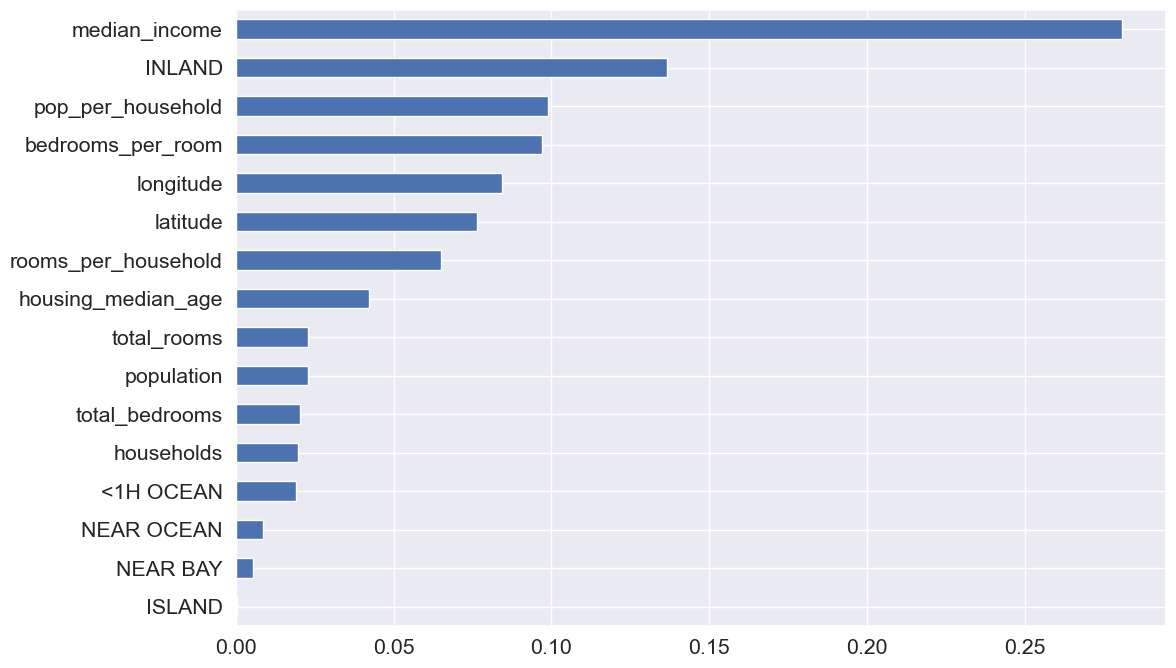

In [196]:
feature_imp.sort_values().plot.barh(figsize = (12, 8))
plt.show()